In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

In [2]:
data=pd.read_csv('train_pCWxroh.csv')
test=pd.read_csv('test_bKeE5T8.csv')

In [3]:
train=data[:10000]
val=data[10000:]

In [4]:
train.shape,val.shape,test.shape

((10000, 2), (3152, 2), (2928, 2))

In [5]:
train.head()

,ID,Count
0,2011100100,135
1,2011100101,96
2,2011100102,111
3,2011100103,102
4,2011100104,54


In [6]:
train=train.reset_index()

In [7]:
train.rename(columns={'index':'tag_index'},inplace=True)

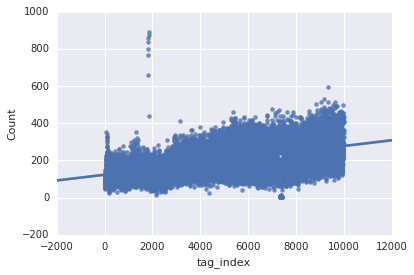

In [8]:
ax = sns.regplot(x="tag_index", y="Count", data=train)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
tag_index    10000 non-null int64
ID           10000 non-null int64
Count        10000 non-null int64
dtypes: int64(3)
memory usage: 234.4 KB


In [10]:
def time_reverse(df,origin_time_index):
    '''
    item in origin_time_index should be  like '2011100100' 
    
    '''
    df['year']=df['%s'%origin_time_index].apply(lambda x: int(str(x)[:4]))
    df['month']=df['%s'%origin_time_index].apply(lambda x: int(str(x)[4:6]))
    df['day']=df['%s'%origin_time_index].apply(lambda x: int(str(x)[6:8]))
    df['hour']=df['%s'%origin_time_index].apply(lambda x: int(str(x)[8:]))
    df['daysize']=df['ID'].apply(lambda x: str(x)[:-2])


In [11]:
time_reverse(train,'ID')

In [12]:
train.head()

,tag_index,ID,Count,year,month,day,hour,daysize
0,0,2011100100,135,2011,10,1,0,20111001
1,1,2011100101,96,2011,10,1,1,20111001
2,2,2011100102,111,2011,10,1,2,20111001
3,3,2011100103,102,2011,10,1,3,20111001
4,4,2011100104,54,2011,10,1,4,20111001


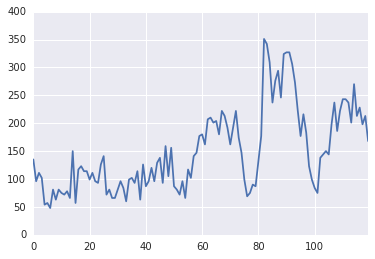

In [13]:
train[:120]['Count'].plot()

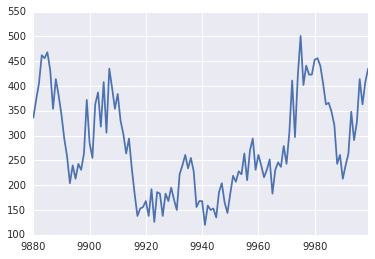

In [14]:
train[-120:]['Count'].plot()

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24)
    rolstd = pd.rolling_std(timeseries, window=24)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
       

/home/kuhung/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
daysize=train.groupby('daysize',as_index=False)['Count'].sum()
daysize.drop(['daysize'],axis=1,inplace=True)

In [17]:
daysize=pd.DataFrame(data=train['Count'])

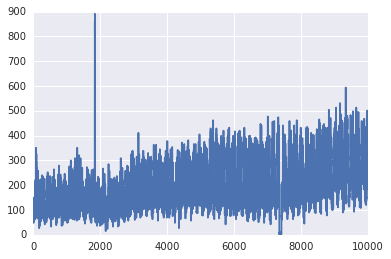

In [18]:
plt.plot(daysize)

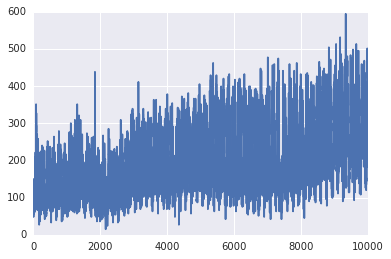

In [19]:
daysize['Count']=daysize['Count'].apply(lambda x: 270 if x>600 else x)
daysize['Count']=daysize['Count'].apply(lambda x: x+180 if x<15 else x)

plt.plot(daysize)

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


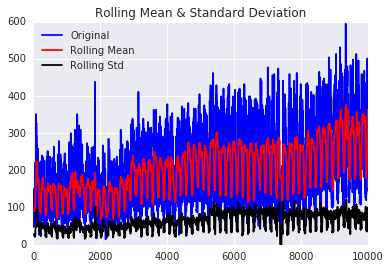

Results of Dickey-Fuller Test:
Test Statistic                -1.019489e+01
p-value                        6.183348e-18
#Lags Used                     3.800000e+01
Number of Observations Used    9.961000e+03
Critical Value (5%)           -2.861830e+00
Critical Value (1%)           -3.431007e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [20]:
test_stationarity(daysize['Count'])

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


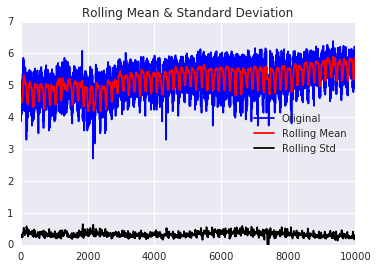

Results of Dickey-Fuller Test:
Test Statistic                -1.053733e+01
p-value                        8.831676e-19
#Lags Used                     3.500000e+01
Number of Observations Used    9.964000e+03
Critical Value (5%)           -2.861830e+00
Critical Value (1%)           -3.431006e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [21]:
test_stationarity(np.log(daysize['Count']))

In [22]:
## more feature

In [23]:
def more_reverse(df):
    '''
    item in origin_time_index should be  like '2011100100' 
    
    '''
    df["Date_mod"] = (pd.to_datetime(df["daysize"], format="%Y-%m-%d"))
    df["WeekDay"] = df["Date_mod"].apply(lambda x: x.weekday())
    df["DayOfYear"] = df["Date_mod"].apply(lambda x: x.timetuple().tm_yday)
    df["WeekNo"] = df["Date_mod"].apply(lambda x: x.isocalendar()[1])

In [24]:
more_reverse(train)

In [25]:
train.head()

,tag_index,ID,Count,year,month,day,hour,daysize,Date_mod,WeekDay,DayOfYear,WeekNo
0,0,2011100100,135,2011,10,1,0,20111001,2011-10-01,5,274,39
1,1,2011100101,96,2011,10,1,1,20111001,2011-10-01,5,274,39
2,2,2011100102,111,2011,10,1,2,20111001,2011-10-01,5,274,39
3,3,2011100103,102,2011,10,1,3,20111001,2011-10-01,5,274,39
4,4,2011100104,54,2011,10,1,4,20111001,2011-10-01,5,274,39


In [26]:
from xgboost import  XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

def RMSE(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

/home/kuhung/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
feature=['year','month','day','hour','WeekDay','DayOfYear','WeekNo']
target=['Count']

In [28]:
model=XGBRegressor()

In [29]:
model.fit(train[feature],np.log(train[target]))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [30]:
RMSE(np.exp(model.predict(train[feature])),train[target])

37.532865152684089

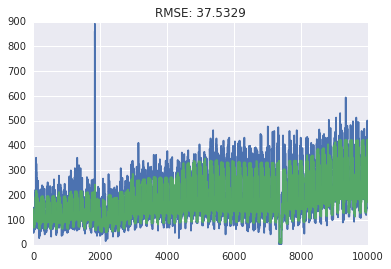

In [31]:
plt.plot(train[target])
plt.plot(np.exp(model.predict(train[feature])))
plt.title('RMSE: %.4f'% RMSE(np.exp(model.predict(train[feature])),train[target]))

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

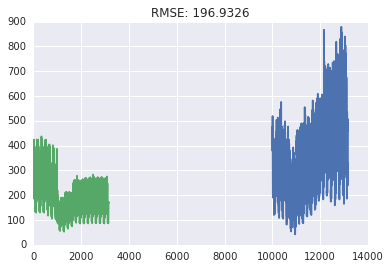

In [32]:
time_reverse(val,'ID')
more_reverse(val)

val.head()

plt.plot(val[target])
plt.plot(np.exp(model.predict(val[feature])))
plt.title('RMSE: %.4f'% RMSE(np.exp(model.predict(val[feature])),val[target]))

In [33]:
time_reverse(data,'ID')
more_reverse(data)

time_reverse(test,'ID')
more_reverse(test)

In [34]:
model.fit(data[feature],np.log(data[target]))
predict = np.exp(model.predict(test[feature]))

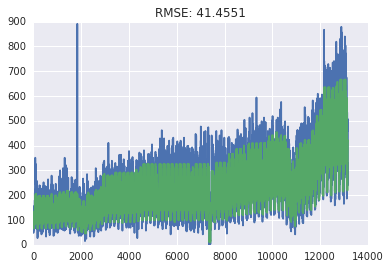

In [35]:
plt.plot(data[target])
plt.plot(np.exp(model.predict(data[feature])))
plt.title('RMSE: %.4f'% RMSE(np.exp(model.predict(data[feature])),data[target]))

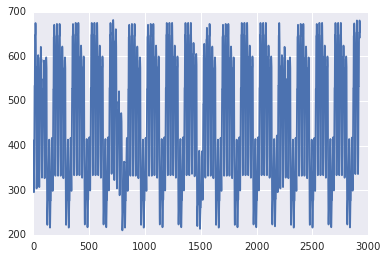

In [36]:
plt.plot(predict)

In [37]:
sub=pd.DataFrame({'0':test['ID'],'1':predict})

In [38]:
sub.columns=['ID','Count']

In [39]:
sub.to_csv('sub_xgb.csv',index=False)

In [ ]:
## ensemble

In [71]:
merge=pd.read_csv('sub_rf.csv')

In [72]:
merge['Count']=merge['Count']*0.6+sub['Count']*0.4

In [73]:
merge.to_csv('merge_46.csv',index=False)

In [40]:
# Estimating & Eliminating Trend

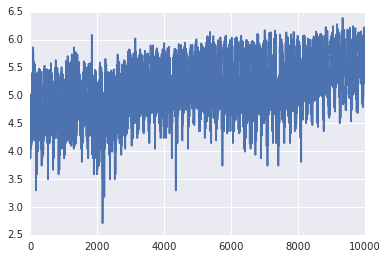

In [41]:
ts_log = np.log(daysize['Count'])
plt.plot(ts_log)

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  if __name__ == '__main__':


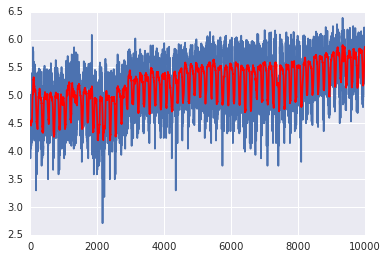

In [42]:
moving_avg = pd.rolling_mean(ts_log,24)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [43]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(24)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23    0.062518
Name: Count, dtype: float64

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


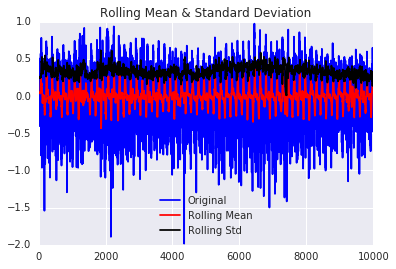

Results of Dickey-Fuller Test:
Test Statistic                -1.736537e+01
p-value                        5.174843e-30
#Lags Used                     3.500000e+01
Number of Observations Used    9.941000e+03
Critical Value (5%)           -2.861831e+00
Critical Value (1%)           -3.431008e+00
Critical Value (10%)          -2.566925e+00
dtype: float64


In [44]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=24,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


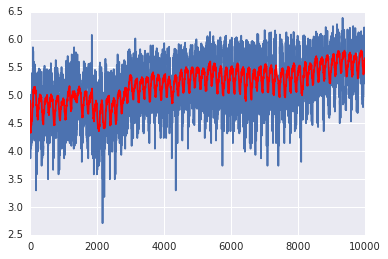

In [45]:
expwighted_avg = pd.ewma(ts_log, halflife=24)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


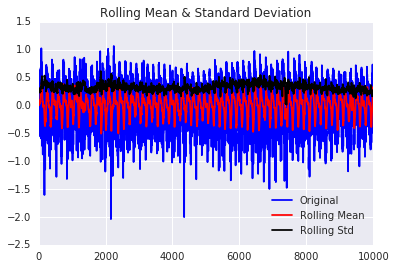

Results of Dickey-Fuller Test:
Test Statistic                -1.706205e+01
p-value                        7.933808e-30
#Lags Used                     3.800000e+01
Number of Observations Used    9.961000e+03
Critical Value (5%)           -2.861830e+00
Critical Value (1%)           -3.431007e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [46]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [47]:
## Eliminating Trend and Seasonality

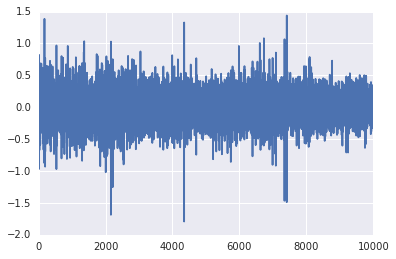

In [48]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


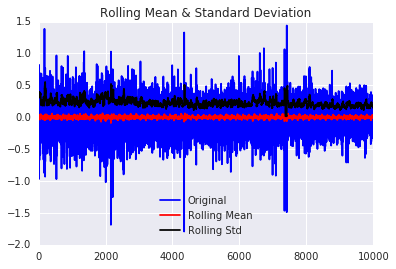

Results of Dickey-Fuller Test:
Test Statistic                -1.700305e+01
p-value                        8.700610e-30
#Lags Used                     3.800000e+01
Number of Observations Used    9.960000e+03
Critical Value (5%)           -2.861830e+00
Critical Value (1%)           -3.431007e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [49]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [50]:
## Forecasting a Time Series

In [51]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [52]:
lag_acf = acf(ts_log_diff, nlags=24)
lag_pacf = pacf(ts_log_diff, nlags=24, method='ols')

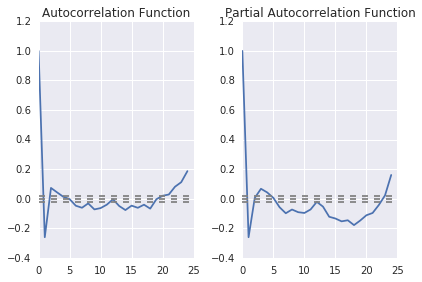

In [53]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [54]:
from statsmodels.tsa.arima_model import ARIMA

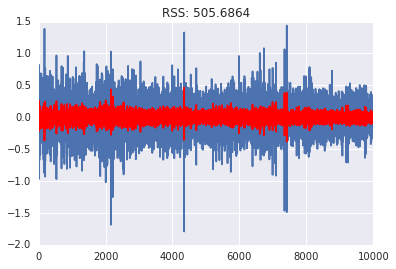

In [55]:
model = ARIMA(np.array(ts_log), order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

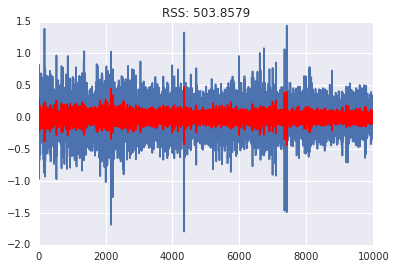

In [56]:
model = ARIMA(np.array(ts_log), order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/home/kuhung/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


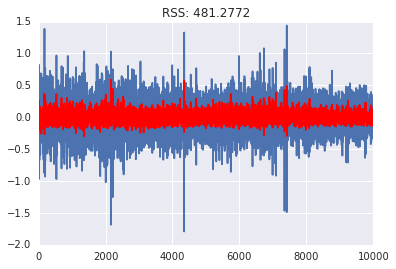

In [57]:
model = ARIMA(np.array(ts_log), order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [58]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

0    0.000083
1    0.089630
2   -0.031137
3    0.035354
4    0.182625
dtype: float64


In [59]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

0    0.000083
1    0.089714
2    0.058576
3    0.093930
4    0.276555
dtype: float64


In [60]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


0    4.905358
1    4.994988
2    4.963851
3    4.999205
4    5.181830
dtype: float64

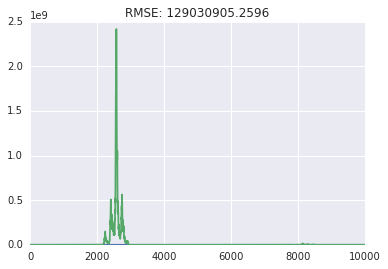

In [61]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(daysize['Count'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-daysize['Count'])**2)/len(daysize['Count'])))